###Basic Concepts

<b>k-partitioning method:</b> Partitioning a dataset D of n objects into k clusters so that an objective function is optimized

A typical objective function: <b>Sum of Squared Errors (SSE):</b>

$$SSE(C) = \sum_{k=1}^K \sum_{x_{i \in C_k}} |x_i - c_k|^2$$

### k-Means

Populating the interactive namespace from numpy and matplotlib


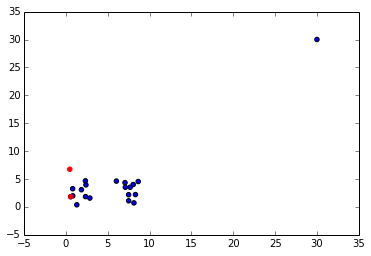

In [99]:
%pylab inline
seed(1234)
x = 3*rand(20)
y = 5*rand(20)
x[9] = 30
y[9] = 30
x[10:] = x[10:]+6
data = np.array([x,y])
scatter(data[0],data[1]);
c1 = 10*rand(2)
c2 = 10*rand(2)
scatter(c1[0],c1[1], color = 'r');
scatter(c2[0],c2[1], color = 'r');

In [132]:
def euclidean_distance(x,y,x_p,y_p):
    return ((x-x_p)**2 + (y-y_p)**2)**0.5

def get_assignment(data, c1, c2):
    output = []
    for x,y in data.T:
        dist1 = euclidean_distance(x,y,c1[0],c1[1])
        dist2 = euclidean_distance(x,y,c2[0],c2[1])
        if(dist1<dist2):
            output.append("c1")
        else:
            output.append("c2")
    return output  

def get_new_centroid(data, assignment):
    c1x = []
    c1y = []
    c2x = []
    c2y = []
    for i,point in enumerate(data.T):
        if(assignment[i]=='c1'):
            c1x.append(point[0])
            c1y.append(point[1])
        else:
            c2x.append(point[0])
            c2y.append(point[1])
    return (array([mean(c1x), mean(c1y)]), array([mean(c2x), mean(c2y)]))        



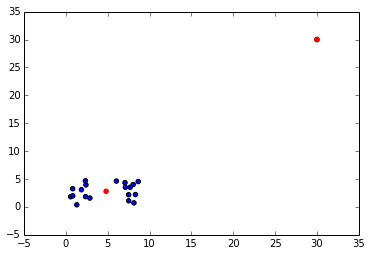

In [96]:
for i in range(20):
    assignment = get_assignment(data,c1,c2) 
    c1,c2 = get_new_centroid(data, assignment)
    
scatter(data[0],data[1])
scatter(c1[0],c1[1], color = 'r')
scatter(c2[0],c2[1], color = 'r')

###k-Medians

We use $L_1$-norm as the distance measure.

The criterion function is: $\sum_{k=1}^K \sum_{x_{i \in C_k}} |x_{ij} - c_{kj}|$

In [101]:
def manhattan_distance(x,y,x_p,y_p):
    return abs(x-x_p) + abs(y-y_p)

def get_m_assignment(data, c1, c2):
    output = []
    for x,y in data.T:
        dist1 = manhattan_distance(x,y,c1[0],c1[1])
        dist2 = manhattan_distance(x,y,c2[0],c2[1])
        if(dist1<dist2):
            output.append("c1")
        else:
            output.append("c2")
    return output  
def get_new_m_centroid(data, assignment):
    c1x = []
    c1y = []
    c2x = []
    c2y = []
    for i,point in enumerate(data.T):
        if(assignment[i]=='c1'):
            c1x.append(point[0])
            c1y.append(point[1])
        else:
            c2x.append(point[0])
            c2y.append(point[1])
    return (array([median(c1x), median(c1y)]), array([median(c2x), median(c2y)]))   

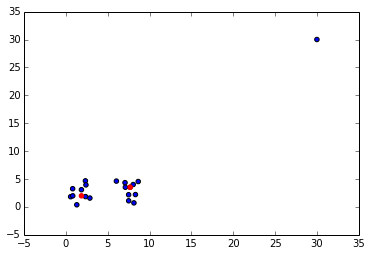

In [103]:
c1 = 10*rand(2)
c2 = 10*rand(2)
for i in range(20):
    assignment = get_m_assignment(data,c1,c2) 
    c1,c2 = get_new_m_centroid(data, assignment)
    
scatter(data[0],data[1])
scatter(c1[0],c1[1], color = 'r')
scatter(c2[0],c2[1], color = 'r')

###Kernel k-Means

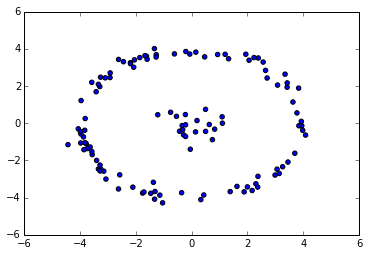

In [134]:
seed(123)
data_center = randn(40).reshape(2,20)/2
myRand = rand(100)
data_ring = 4*asarray([cos(2*pi*myRand)+randn(100)/20, sin(2*pi*myRand)+randn(100)/20]) 
data = concatenate((data_ring.T, data_center.T)).T
scatter(data[0], data[1]);

[ 2.13120265  0.17784933] [-2.33338387 -0.12993354]


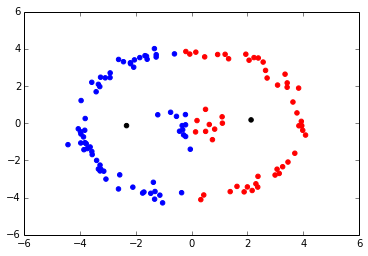

In [154]:
seed(123)
c1 = 10*rand(2)
c2 = 10*rand(2)
for i in range(20):
    assignment = get_assignment(data,c1,c2) 
    c1,c2 = get_new_centroid(data, assignment)

assignment = get_assignment(data,c1,c2)    
for i,d in enumerate(data.T):
    if(assignment[i] == 'c1'):
        scatter(d[0],d[1], color = 'red')
    else:
        scatter(d[0],d[1], color = 'blue')

scatter(c1[0],c1[1], color = 'k')
scatter(c2[0],c2[1], color = 'k')
print(c1,c2)

Apparently the lectures are quite bad on this one, as there are numerous threads in the forum about this 8 minute lecture.

First, what we can do is a non-linear transform (this is not the kernel method, but is mentioned in the lecture)

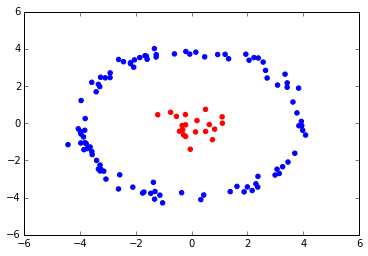

In [168]:
non_lin_data = sum(data.T**2, 1)
def lin_distance(x,y):
    return exp(-(x-y)**2)

def get_nl_assignment(data, c1, c2):
    output = []
    for x in data:
        dist1 = lin_distance(x,c1)
        dist2 = lin_distance(x,c2)
        if(dist1<dist2):
            output.append("c1")
        else:
            output.append("c2")
    return output  
def get_new_nl_centroid(data, assignment):
    c1 = []
    c2 = []
    for i,point in enumerate(data):
        if(assignment[i]=='c1'):
            c1.append(point)
        else:
            c2.append(point)
    return (mean(c1), mean(c2))   
seed(123)
c1 = 10*rand()
c2 = 10*rand()
for i in range(20):
    assignment = get_nl_assignment(non_lin_data,c1,c2) 
    c1,c2 = get_new_nl_centroid(non_lin_data, assignment)

assignment = get_nl_assignment(non_lin_data,c1,c2)    
for i,d in enumerate(data.T):
    if(assignment[i] == 'c1'):
        scatter(d[0],d[1], color = 'red')
    else:
        scatter(d[0],d[1], color = 'blue')


Ok... So that worked extraordinarily well...

now, let's look at this kernel method.

-"kernel trick". Instead of transformation each data point separately, create pairwise matrix K(x1,x2) where K is similarity function, called a kernel. Then apply linear methods on kernel matrix. Advantage of this approach is that it allows to operate in potentially infinite dimension space where explicit transformation may not even exist or not known.

meaning that we need a big-dimensional k-means, let's try with a small example:

In [182]:
small_data = array([[0,0],[4,4],[4,-4],[-4,-4],[-4,4]])
def radial_distance(x,y,x_p,y_p):
    return exp((-(x-x_p)**2 -(y-y_p)**2)/(2*16))

small_r_data = [[None for i in range(len(small_data))] for j in range(len(small_data))]
for i in range(len(small_data)):
    for j in range(len(small_data)):
        small_r_data[i][j] = radial_distance(small_data[i][0],small_data[i][1],small_data[j][0],small_data[j][1] )
array(small_r_data)


array([[ 1.        ,  0.36787944,  0.36787944,  0.36787944,  0.36787944],
       [ 0.36787944,  1.        ,  0.13533528,  0.01831564,  0.13533528],
       [ 0.36787944,  0.13533528,  1.        ,  0.13533528,  0.01831564],
       [ 0.36787944,  0.01831564,  0.13533528,  1.        ,  0.13533528],
       [ 0.36787944,  0.13533528,  0.01831564,  0.13533528,  1.        ]])

hmmm... still don't get it.

moving on for now

but here is a link for the future: https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm

and another one : https://en.wikipedia.org/wiki/Radial_basis_function_kernel